# PAN Card Tampering Detection

In this project, we will detect tamperung of pan card using computer vision.This project will help the different organization in detecting whether the ID,That is ,The Pan Card provided to them by their employees or customers or anyone is original or not.

## Steps

1. Get images from users.
2. Check For Size and format of images.
3. Change shape and size of image according to the original image.
4. Convert the image to grayscale.
5. Find the similarity index of the images.
6. Finding the threshold of the image.
7. Finding contour and grab those contour using imutils.
8. Draw a bounding rectangle using these contours.
9. Plot difference,threshold,original and tampered image.
10. Compare all images and check the similarity score to decide tampering.

For this project we will calculate structural similarity of original PAN card and PAN card uploaded by user.

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity  ##for structural similarity score between the orginal and tampered
import imutils ##  helping to grabing contour the image
import cv2  ## computer vision to image processing
from PIL import Image ## Downloading and visualizing image
import requests ## fetch the data or image from URL
from io import BytesIO


In [6]:
!mkdir pan_card_tampering\image


In [4]:
# open image and  display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

## Loading the original and user provided image

In [7]:
# The file format of the source file
print("Original image format : ",original.format)
print("Tampered image format : " , tampered.format)

#image size, in pixels. The size is given as a 2-tuple (width,height)

print("Original image size : " , original.size)
print("Tampered image size : " , tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


## Converting the format of tampered image similar to original image

In [13]:
# Resize image
#Convering JPEG to png
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering\image\original.png')#save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png")

(250, 160)
(250, 160)


In [15]:
# we can change image type if required from png to jpg
tampered = Image .open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#also can do png to jpg(use(.jpg instead of .png)

Display original image

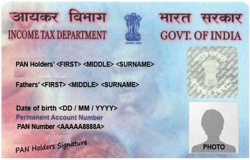

In [16]:
original

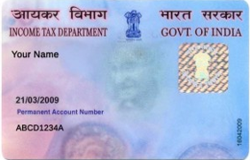

In [17]:
tampered

## compare the image for Similarity or dissimilarity using cv2

In [19]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

## Reading image using opencv

## Convert the images to grayscale

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel[RGB] while grayscale has only 1 channel.  

In [20]:
original_gray       = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray   = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [21]:
## Compute the Structural Similarity Index (SSIM) between the two images,ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff = (diff * 225).astype("uint8")#usingd 255 dividing to normalise the image
print("SSIM : {}".format(score))

SSIM : 0.31678790332739426


 Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

## Calculating threshold and contours

   ### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [23]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]  # all are predefined
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

## Creating a bounding rectangle

### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

In [24]:
# loop over the contours

for c in cnts:
    #applying contours on image
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original,(x,y),(x + w, y + h),(0, 0, 255),2)
    cv2.rectangle(tampered, (x,y),(x + w , y + h),(0,0,255),2)

Original Format Image


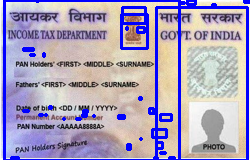

In [25]:
#Display original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


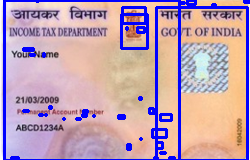

In [26]:
#Display tampered image with contour
print ('Tampered Image')
Image.fromarray(tampered)

Different Image


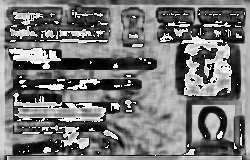

In [27]:
#Display difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


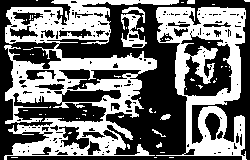

In [28]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

# SUMMARY

### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

# SCOPE

## This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.